In [1]:
%load_ext autoreload

In [2]:
import os

import glob
import pickle
import pyvista as pv
from itertools import product
from matplotlib import pyplot as plt
import imageio

In [3]:
store_results = True

In [4]:
def read_plot_kwargs(file_name, file_extension='obj'):
    if file_extension == 'obj': f_read = lambda f: pickle.load(open(f,'rb'))
    if file_extension == 'png': f_read = lambda f: imageio.imread(f)
                                                             
    objs = {os.path.normpath(f).split('/')[-2]:f_read(f)
            for f in glob.glob('../experiments/swiss_roll/results/*/{}.{}'.format(
                file_name, file_extension), recursive=True)}
    objs.pop('ppca_3_components')
    return objs

In [5]:
pv.set_plot_theme("document")
pv.set_jupyter_backend('None')

# if store_results:
#     result_save_path = '../experiments/swiss_roll/results/ppca_2_components'
#     pv.set_jupyter_backend('None')
# else:
#     pv.set_jupyter_backend('ipygany')
#     result_save_path = None

In [6]:
plot_shape = (1, 2)

In [7]:
def plotter_for_each_panel(axis, f_plot, plot_kwargs, plot_shape):
    keys = list(plot_kwargs.keys())
    for i in range(plot_shape[0]):
        for j in range(plot_shape[1]):
            index = i + j 
            key = keys[index]

            plotter.subplot(i, j)
            plotter.add_text(key, font_size=24)
            f_plot(**plot_kwargs[key], axis=axis)
            
def image_plotter_for_each_panel(imgs, plot_shape):
    keys = list(imgs.keys())
    for i in range(0, plot_shape[0]*plot_shape[1]):
        key = keys[i] 
        g = fig.add_subplot(*plot_shape, i+1)
        g.title.set_text(key)
        plt.axis('off')
        plt.imshow(imgs[key])

### Input Representation

In [8]:
imgs = read_plot_kwargs('base_representation', 'png')

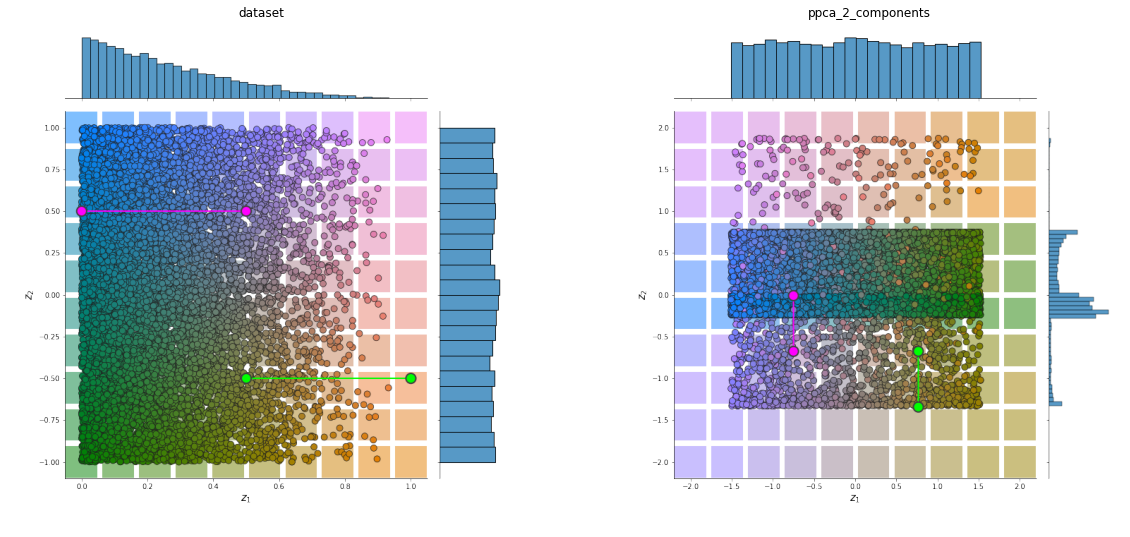

In [9]:
fig = plt.figure(figsize=(plot_shape[1]*10,plot_shape[0]*10))
image_plotter_for_each_panel(imgs, plot_shape)
plt.show()

### Input Reconstruction

In [10]:
from pdmtut.vis import plot_reconstruction

plot_kwargs = read_plot_kwargs('reconstruction')

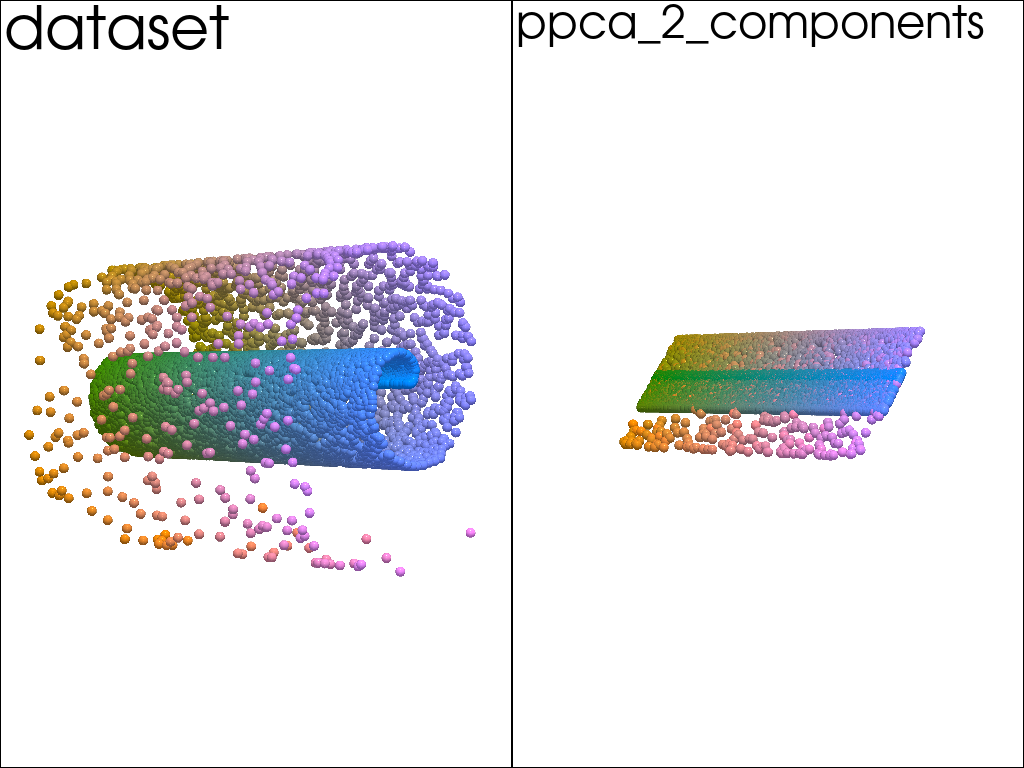

In [11]:
plotter = pv.Plotter(shape=plot_shape)

plotter_for_each_panel(plotter, plot_reconstruction, plot_kwargs, plot_shape)

plotter.link_views()
plotter.camera_position = [(-65, 0, 65), (0, 0, 0), (0, 1, 0)]
_ = plotter.show()

### Density Estimation

In [12]:
from pdmtut.vis import plot_density

plot_kwargs = read_plot_kwargs('discrete_density')

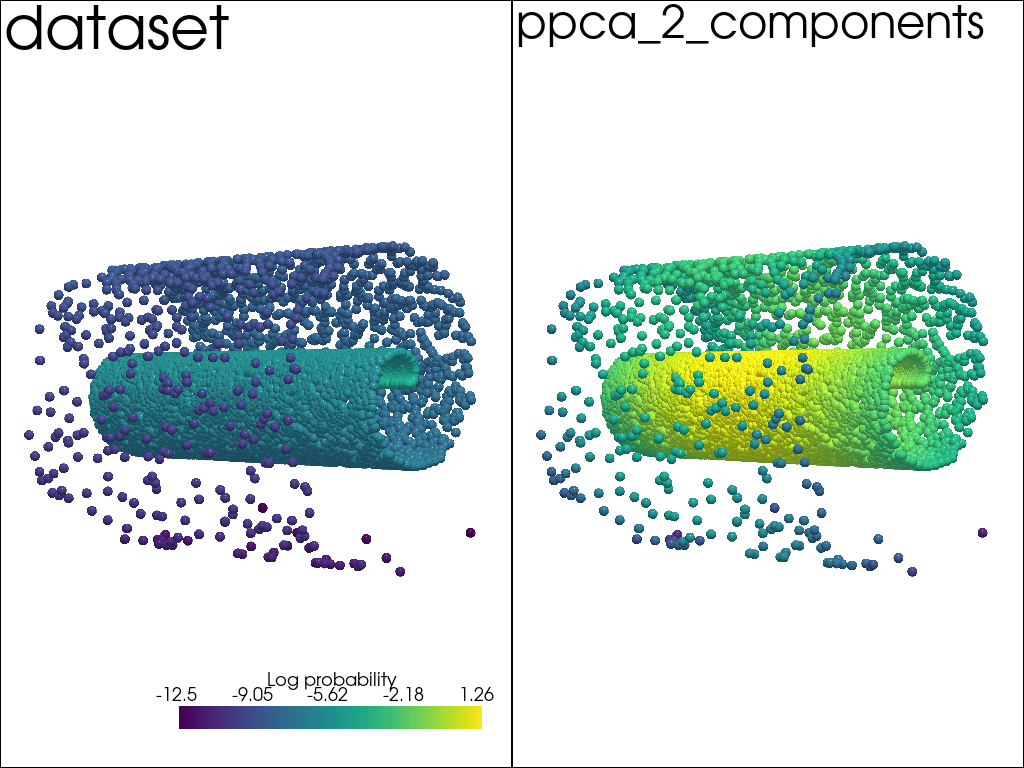

In [13]:
plotter = pv.Plotter(shape=plot_shape)

plotter_for_each_panel(plotter, plot_density, plot_kwargs, plot_shape)

plotter.link_views()
plotter.camera_position = [(-65, 0, 65), (0, 0, 0), (0, 1, 0)]
_ = plotter.show()

### Generate Samples

In [14]:
from pdmtut.vis import plot_generated_samples

plot_kwargs = read_plot_kwargs('generated_samples')

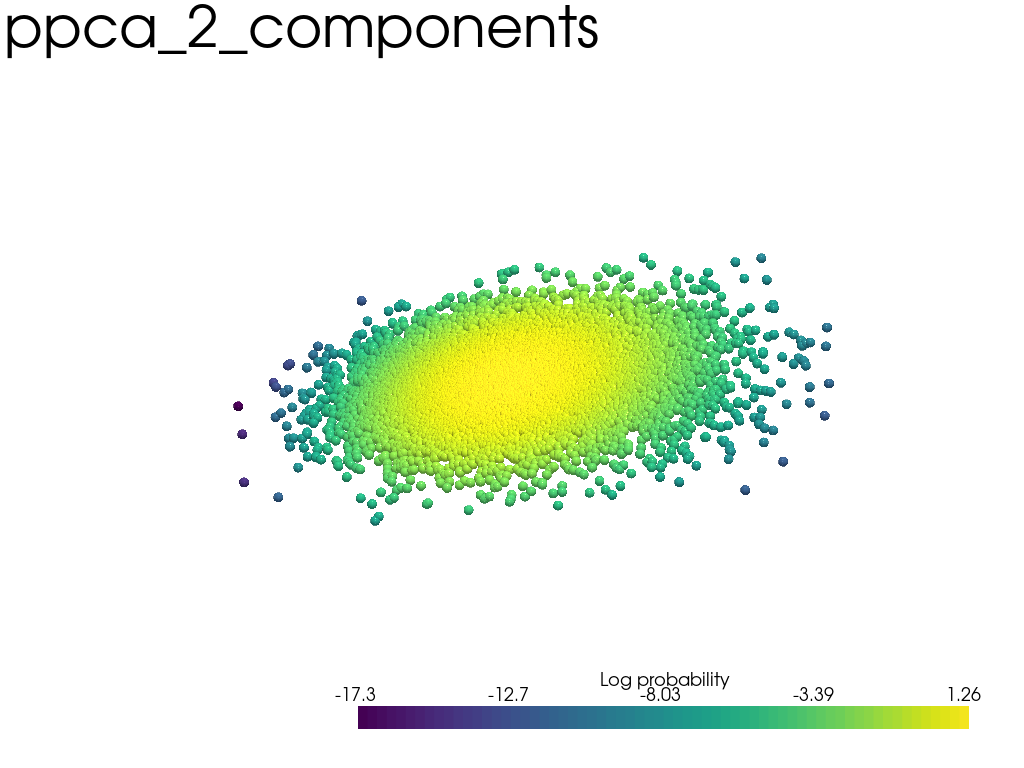

In [15]:
plotter = pv.Plotter(shape=(plot_shape[0], plot_shape[1]-1))

plotter_for_each_panel(plotter, plot_generated_samples, plot_kwargs, (plot_shape[0], plot_shape[1]-1))

plotter.link_views()
plotter.camera_position = [(-65, 0, 65), (0, 0, 0), (0, 1, 0)]
_ = plotter.show()

### Interpolation

In [16]:
from pdmtut.vis import plot_interpolation

plot_kwargs = read_plot_kwargs('interpolation')

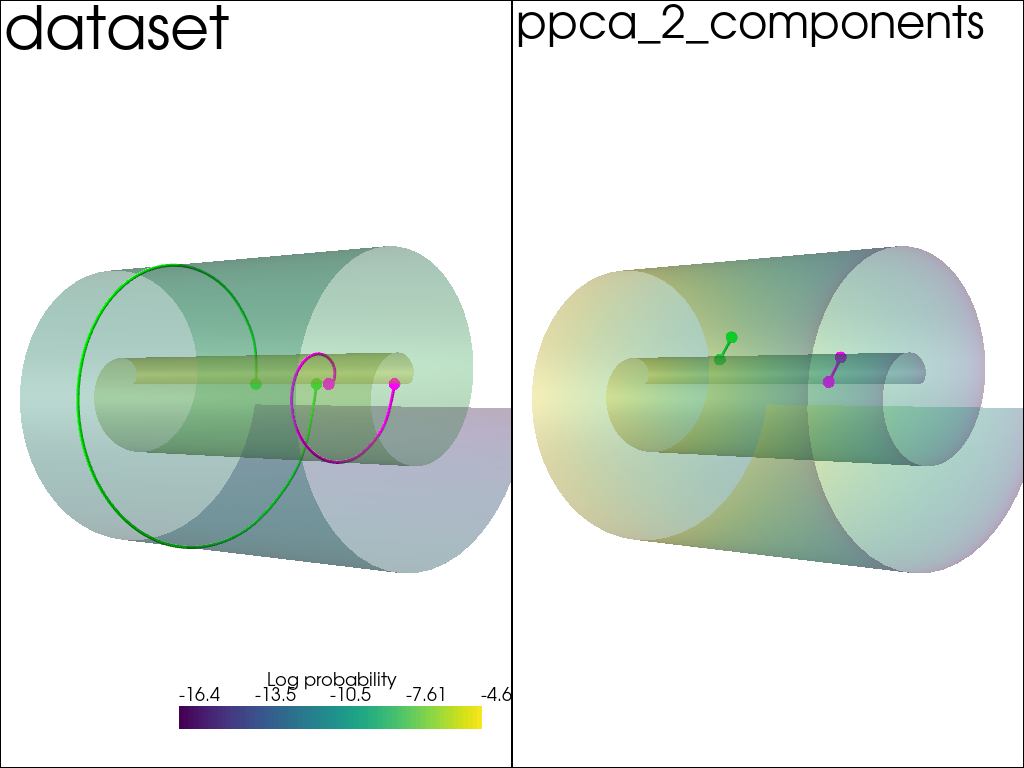

In [17]:
plotter = pv.Plotter(shape=plot_shape)

plotter_for_each_panel(plotter, plot_interpolation, plot_kwargs, plot_shape)

plotter.link_views()
plotter.camera_position = [(-65, 0, 65), (0, 0, 0), (0, 1, 0)]
_ = plotter.show()